# Wprowadzenie

Niniejszy zeszyt jest realizacją zadania praktycznego w pracy inżynierskiej:


    Regresja logistyczna w uczeniu maszynowym na przykładzie badania
    stabilności sieci energetycznej.
    
    
Zbiór uczący zostanie przeanalizowany, sprawdzony pod kątem przygotowania danych do uczenia maszynowego, a następnie przeprowadzone zostaną procesy uczenia dla 3 różnych algorytmów:
* regresji logistycznej,
* lasów losowych,
* maszyn wektorów nośnych.

Najwięcej uwagi zostanie poświęconej modelu logistycznemu. Model zostanie stworzony na danych przeskalowanych, nieskalowanych oraz z niektórymi wybranymi atrybutami. 


# Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.metrics import confusion_matrix
sns.set()


D:\Programy\Anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Analiza danych

W tej sekcji zostanie przeanalizowany model pod kątem zbilansowania danych, korelacji, rozkładów cech oraz występowania braków danych.

In [2]:
raw_data = pd.read_csv('Data_for_UCI_named.csv')
type(raw_data)

pandas.core.frame.DataFrame

In [3]:
raw_data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [4]:
raw_data[['p1','p2','p3','p4']].describe()

,p1,p2,p3,p4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.750000,-1.250000,-1.250000,-1.250000
std,0.752160,0.433035,0.433035,0.433035
min,1.582590,-1.999891,-1.999945,-1.999926
25%,3.218300,-1.624901,-1.625025,-1.624960
50%,3.751025,-1.249966,-1.249974,-1.250007
75%,4.282420,-0.874977,-0.875043,-0.875065
max,5.864418,-0.500108,-0.500072,-0.500025


In [5]:
raw_data[['g1','g2','g3','g4']].describe()

,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.525000,0.525000,0.525000,0.525000
std,0.274256,0.274255,0.274255,0.274255
min,0.050009,0.050053,0.050054,0.050028
25%,0.287521,0.287552,0.287514,0.287494
50%,0.525009,0.525003,0.525015,0.525002
75%,0.762435,0.762490,0.762440,0.762433
max,0.999937,0.999944,0.999982,0.999930


In [6]:
raw_data['stabf'].describe()

count        10000
unique           2
top       unstable
freq          6380
Name: stabf, dtype: object

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


Analiza wskazuje niewystępowanie pustych wartości, dzięki czemu nie potrzeba wypełniania tzw. "missing values" medianą, średnią lub poprzez inne techniki.
Brak również dummy variables - zmiennych jakościowych, dzięki czemu w regresji logistycznej nie trzeba wcześniej tworzyć takich. Wyjątkiem jest zmienna objaśniana, która zostanie zmapowana na zmienną binarną poniżej.  

# Stworzenie zmiennej binarnej

In [8]:
data_mapped = raw_data.copy() 
data_mapped['stabf'] = data_mapped['stabf'].map({'unstable': 0, 'stable': 1})
data_mapped = data_mapped.drop(labels = 'stab', axis = 1)
data_mapped

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


# Badanie korelacji

Badanie korelacji potwierdzi, czy należy ograniczyć ilość atrybutów tylko do niektórych. Z wiedzy na temat zbioru uczącego można wnioskować, że korelację będą wykazywały moce użytkowników i dostawcy energii w sieci.

<AxesSubplot:>

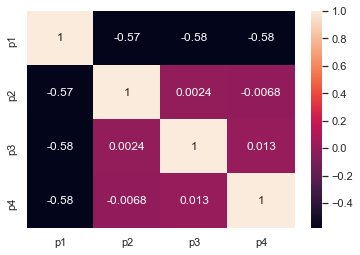

In [9]:
corr_p1_p2 = data_mapped[['p1', 'p2', 'p3', 'p4']].corr()
sns.heatmap(corr_p1_p2, annot = True) #annot - wartości korelacji

<AxesSubplot:>

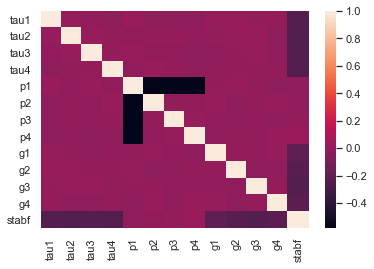

In [10]:
correlation_matrix = data_mapped.corr()
sns.heatmap(correlation_matrix)

<AxesSubplot:>

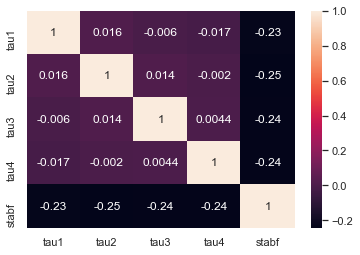

In [11]:
corr_t1_t2 = data_mapped[['tau1', 'tau2', 'tau3', 'tau4', 'stabf']].corr()
sns.heatmap(corr_t1_t2, annot = True) #annot - wartości korelacji

<AxesSubplot:>

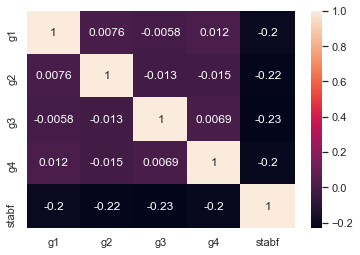

In [12]:
corr_t1_t2 = data_mapped[['g1', 'g2', 'g3', 'g4', 'stabf']].corr()
sns.heatmap(corr_t1_t2, annot = True) #annot - wartości korelacji

<AxesSubplot:>

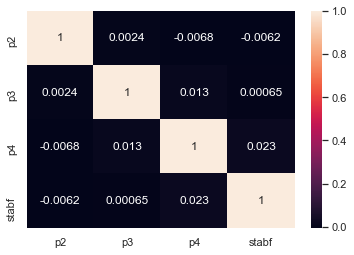

In [13]:
corr_t1_t2 = data_mapped[[ 'p2', 'p3', 'p4', 'stabf']].corr()
sns.heatmap(corr_t1_t2, annot = True) #annot - wartości korelacji

# Histogramy

Histogramy mają na celu zwizualizowanie rozkładów cech oraz wykrycie silnych wartości odstających. 

In [14]:
data_mapped[['tau1', 'tau2', 'tau3', 'tau4']].count()

tau1    10000
tau2    10000
tau3    10000
tau4    10000
dtype: int64

In [15]:
data_mapped['stabf'].value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

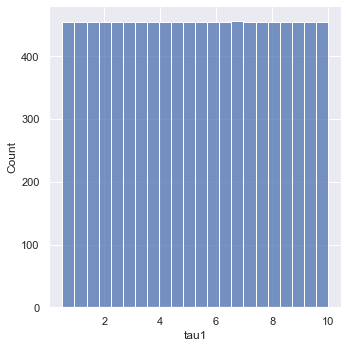

In [16]:
sns.displot(data_mapped, x ='tau1' )

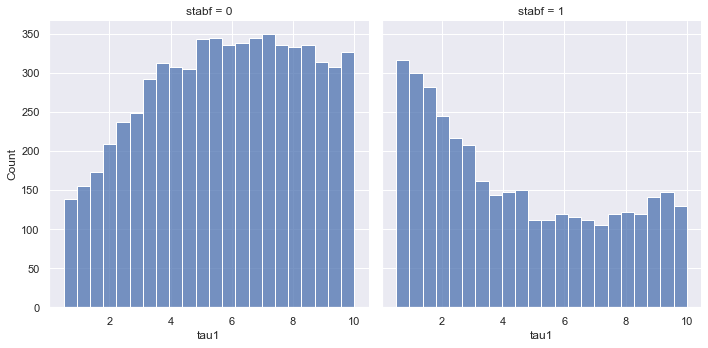

In [17]:
sns.displot(data_mapped, x ='tau1', col = "stabf" )

Pozbiory nie mają równej ilości obserwacji, dlatego porównując rozkłady znormalizujemy napierw histogramy, parametr common_norm powoduje, że obydwa zbiory są normalizowane niezależnie

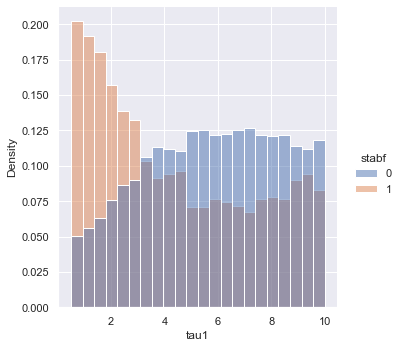

In [18]:
sns.displot(data_mapped, x ='tau1', hue = "stabf", stat ='density', common_norm=False )

In [19]:
tau1_0 = data_mapped.loc[data_mapped['stabf'] == 0, 'tau1']
tau1_0.skew()

-0.16225006467506523

In [20]:
tau1_1 = data_mapped.loc[data_mapped['stabf'] == 1, 'tau1']
tau1_1.skew()

0.416282659833944

In [21]:
df_tau1 = pd.DataFrame(data = [tau1_0.skew(), tau1_1.skew()], index = ['niestabilny', 'stabilny'], columns = ['Skośność'])
df_tau1

,Skośność
niestabilny,-0.162250
stabilny,0.416283


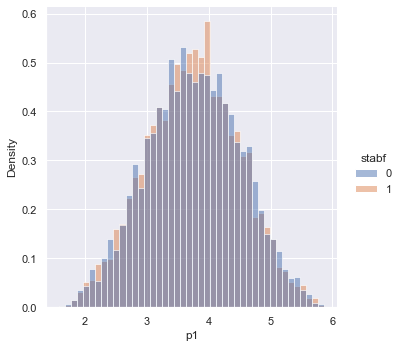

In [22]:
sns.displot(data_mapped, x ='p1', hue = "stabf", stat ='density', common_norm=False )

In [23]:
p1_0 = data_mapped.loc[data_mapped['stabf'] == 0, 'p1']
p1_1 = data_mapped.loc[data_mapped['stabf'] == 1, 'p1']
df_p1 = pd.DataFrame(data = [p1_0.skew(), p1_1.skew()], index = ['niestabilny', 'stabilny'], columns = ['Skośność'])
df_p1

,Skośność
niestabilny,-0.017463
stabilny,-0.005281


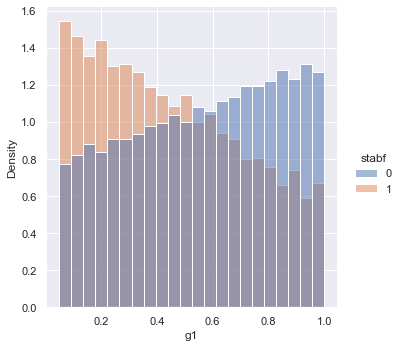

In [24]:
sns.displot(data_mapped, x ='g1', hue = "stabf", stat ='density', common_norm=False )

In [25]:
g1_0 = data_mapped.loc[data_mapped['stabf'] == 0, 'g1']
g1_1 = data_mapped.loc[data_mapped['stabf'] == 1, 'g1']
df_g1 = pd.DataFrame(data = [g1_0.skew(), g1_1.skew()], index = ['niestabilny', 'stabilny'], columns = ['Skośność'])
df_g1

,Skośność
niestabilny,-0.180337
stabilny,0.317254


# Usuwanie p1

Należy usunąć zmienną, która jest zależna od innych, czyli p1. W drugim dodatku do pracy przeprowadzona została analiza modeli, gdy usunięte będą też inne cechy.

In [26]:
data_with_p1 = data_mapped.copy()
data_without_p1 = data_with_p1.drop('p1', axis=1)
data_without_p1

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


# Train test split

Zbiór uczący zostanie podzielony na zbiór treningowy i testowy (o rozmiarze równym 30% całego zbioru). Należy zwrócić uwagę, czy interesuje nas zbiór zawierajacy atrybut p1. 

In [27]:
from sklearn.model_selection import train_test_split
### BEZ P1 #########
data = data_without_p1.copy()
features_name = ['intercept','tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2',
'g3', 'g4'] 
########################
######### Z P1 ###########
# data = data_with_p1.copy()
# features_name = ['intercept','tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
# 'g3', 'g4'] 
#############################
X = data.drop('stabf', axis = 1)
y = data['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# MODEL BEZ MOCY

Ta którka sekcja służy zbadaniu modelu, który nie posiada w ogóle informacji o mocy w sieci. Ten krok został podjęty, ponieważ p value statystycznie wskazują na nieistotność cechy. Nie jest to jednak jednoznaczne w praktycznym podejściem do problemu, gdzie moc może okazać się istotna pod kątem fizycznym.

In [28]:
X_train_without_p = X_train.drop(["p2",  "p3", "p4"], axis=1)
features_without_p = ['intercept','tau1', 'tau2', 'tau3', 'tau4', 'g1', 'g2',
'g3', 'g4']
x_1 = sm.add_constant(X_train_without_p)
reg_log_without_p = sm.Logit(y_train, x_1)
reg_log_without_p = reg_log_without_p.fit_regularized()

reg_log_without_p.summary(xname = features_without_p)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.38965846439360824
            Iterations: 39
            Function evaluations: 41
            Gradient evaluations: 39


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.4065
Time:                        19:50:59   Log-Likelihood:                -2727.6
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.8535      0.298     39.831      0.000      11.270      12.437
tau1          -0.3165      0.014    -23.365      0.000      -0.343      -0.290
tau2          -0.3230      0.014    -23.742      0.000      -0.350      -0.296
tau3          -0.3266      0.014    -23.953      0.000      -0.353      -0.300
tau4          -0.3368      0.014    -24.444      0.000      -0.364      -0.310
g1            -2.7407      0.134    -20.507      0.000      -3.003      -2.479
g2            -2.9120      0.135    -21.644      0.000      -3.176      -2.648
g3            -2.9662      0.135    -21.964      0.000      -3.231      -2.701
g4            -2.8777      0.133    -21.588      0.000      -3.139      -2.616
==============================================================================
"""

## Miara recall dla takiego zbioru

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
X_test_without_p = X_test.drop(["p2","p3","p4"], axis=1)
log_clf_without_p =  LogisticRegression( C = 1e9,solver = 'newton-cg' ).fit(X_train_without_p, y_train)
y_pred_logit_without_p = log_clf_without_p.predict(X_test_without_p)
recall_score(y_test,y_pred_logit_without_p)


0.704052780395853

## BIC

In [30]:
print(reg_log_without_p.bic)

5534.901490362852


# Feature scaling

W tej sekcji zbiór uczący zostanie poddany skalowaniu poprzez standaryzację. 

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# STWORZENIE MODELI UCZENIA MASZYNOWEGO

# Regresja logistyczna

Regresja logistyczna zostanie przeprowadzona zarówno dla danych skalowanych jak i nieskalowanych. Okaże się, że proces standaryzacji nie poprawił znacząco wyników.

Wykorzytano również dwie biblioteki uczenia maszynowego - statsmodels ze względu na szeroki opis statystyczny modelu oraz sklearn ze względu na jego efektywność.

## Model z danymi bez skalowania

### STATSMODELS

In [32]:
x_1 = sm.add_constant(X_train)
reg_log_1 = sm.Logit(y_train, x_1)
results_log_1 = reg_log_1.fit_regularized()

results_log_1.summary(xname = features_name)
print("BIC = {}".format(results_log_1.bic))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.38926212156512574
            Iterations: 55
            Function evaluations: 57
            Gradient evaluations: 55
BIC = 5555.91368704821


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### SKLEARN

In [33]:
from sklearn.linear_model import LogisticRegression
import time

start = time.time()
log_clf =  LogisticRegression( C = 1e9, solver = 'newton-cg')
log_clf.fit(X_train, y_train)
end = time.time()
print("Elapsed time: ",end - start)
print("Intercept and coef: {} , {}".format(log_clf.coef_, log_clf.intercept_))
params = np.append(log_clf.intercept_, log_clf.coef_)

x_t = X_train.head(1)
x_t = np.append(1, x_t)
print(x_t)
pi = math.exp(np.dot(x_t, params))/(1+math.exp(np.dot(x_t, params)))
print("Pi_1 = {}".format(pi))
print("Pi_2 = {}".format(1-pi))


Elapsed time:  0.06301426887512207
Intercept and coef: [[-0.31738279 -0.32311978 -0.3267391  -0.33700186  0.05629906 -0.13130455
   0.12039283 -2.73631118 -2.91505049 -2.97337793 -2.88595004]] , [11.92337361]
[ 1.          7.30876647  3.71857489  0.89045188  9.8210065  -1.12972199
 -1.3799849  -1.88172913  0.19812965  0.2861812   0.23983858  0.25585561]
Pi_1 = 0.8658396429885763
Pi_2 = 0.1341603570114237


## Model z danymi ze skalowaniem

### Statsmodels

In [34]:
x = sm.add_constant(X_train_scaled)
reg_log = sm.Logit(y_train, x)
results_log = reg_log.fit()
results_log.summary(xname = features_name)

Optimization terminated successfully.
         Current function value: 0.389262
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.4071
Time:                        19:50:59   Log-Likelihood:                -2724.8
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0387      0.038    -27.266      0.000      -1.113      -0.964
tau1          -0.8685      0.037    -23.381      0.000      -0.941      -0.796
tau2          -0.8876      0.037    -23.738      0.000      -0.961      -0.814
tau3          -0.8998      0.038    -23.924      0.000      -0.974      -0.826
tau4          -0.9225      0.038    -24.445      0.000      -0.996      -0.849
p2             0.0244      0.034      0.719      0.472      -0.042       0.091
p3            -0.0568      0.034     -1.675      0.094      -0.123       0.010
p4             0.0522      0.034      1.549      0.121      -0.014       0.118
g1            -0.7442      0.036    -20.470      0.000      -0.815      -0.673
g2            -0.8003      0.037    -21.648      0.000      -0.873      -0.728
g3            -0.8151      0.037    -21.987      0.000      -0.888      -0.742
g4            -0.7900      0.037    -21.619      0.000      -0.862      -0.718
==============================================================================
"""

In [35]:
p_values = results_log.summary2(xname = features_name).tables[1]['P>|z|']
p_values

intercept    1.066408e-163
tau1         6.676004e-121
tau2         1.451483e-124
tau3         1.725659e-126
tau4         5.638742e-132
p2            4.720577e-01
p3            9.399546e-02
p4            1.214305e-01
g1            3.945734e-93
g2           6.348126e-104
g3           3.807494e-107
g4           1.200307e-103
Name: P>|z|, dtype: float64

### Sklearn

In [36]:
log_clf =  LogisticRegression( C = 1e9, solver = 'newton-cg')
log_clf.fit(X_train_scaled, y_train)
params = np.append(log_clf.intercept_, log_clf.coef_)
print("Intercept and coef: {} ".format(params))

x_t = X_train_scaled[0,:]
x_t = np.append(1, x_t)
pi = math.exp(np.dot(x_t, params))/(1+math.exp(np.dot(x_t, params)))
print("Pi_1 = {}".format(pi))
print("Pi_2 = {}".format(1-pi))

Intercept and coef: [-1.03870502 -0.86851445 -0.8875602  -0.8998078  -0.92248374  0.02439699
 -0.05677581  0.05222928 -0.74419334 -0.80034805 -0.81510856 -0.78996773] 
Pi_1 = 0.8658395945717557
Pi_2 = 0.13416040542824426


In [37]:
from sklearn.model_selection import cross_val_predict
y_probas_logit = cross_val_predict(log_clf, X_train_scaled, y_train, cv = 3, method = 'predict_proba')
y_scores_logit = y_probas_logit[:,1]

## LASY LOSOWE

### SZUKANIE PARAMETRÓW DLA MODELU

Szukanie paramewtrów odbywa się dzięki narzędziu RandomizedSearchCV.  Model zostanie wyuczony poprzez zbiór bez standaryzacji. Nie ma to w tym przypadku znaczenia, ponieważ lasy losowe nie wykonują obliczeń na danych numerycznych.

In [38]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier


# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)


# random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#                'max_features': ['auto', 'sqrt'],
#                'max_depth': max_depth,
#                'min_samples_split': [2,5,10],
#                'min_samples_leaf':  [1,2, 4],
#                'bootstrap': [True, False]}


# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,  n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_random.best_params_

### MODEL

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
start = time.time()
clf_forest = RandomForestClassifier(n_estimators=1200,
                                    min_samples_split = 2,
                                    min_samples_leaf = 2,
                                    max_features = 'sqrt',
                                    max_depth =  20,
                                    bootstrap = True,
                                    random_state = 42)
clf_forest.fit(X_train, y_train)
end = time.time()
print("Elapsed time: ",end - start)
clf_forest.predict_proba(X_train.head(1))

Elapsed time:  13.427017211914062


array([[0.05186905, 0.94813095]])

In [40]:
y_probas_forest = cross_val_predict(clf_forest, X_train, y_train, cv = 3, method = 'predict_proba')
y_scores_forest = y_probas_forest[:,1]

In [41]:
y_predicted = clf_forest.predict(X_test)

confusion_matrix(y_test, y_predicted)

array([[1833,  106],
       [ 142,  919]], dtype=int64)

## SVM

In [42]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# parameters_svc = {'C': [0.1, 1, 100, 1000],
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['poly', 'rbf']}

# svc_random = GridSearchCV(SVC(), parameters_svc, cv=5)
# svc_random.fit(X_train, y_train)
# svc_random.best_params_

In [43]:
from sklearn.svm import SVC
start = time.time()
svm_clf = SVC(C= 1000, gamma= 0.01, kernel= 'rbf', random_state=42, probability = True)
svm_clf.fit(X_train, y_train)
end = time.time()
print("Elapsed time: ",end - start)

Elapsed time:  6.141380310058594


In [44]:
y_probas_svm = cross_val_predict(svm_clf, X_train, y_train, cv = 3, method = 'predict_proba')
y_scores_svm = y_probas_forest[:,1]

y_predicted = svm_clf.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[1886,   53],
       [  35, 1026]], dtype=int64)

# TUNING LOGISTIC REGRESSION PARAMS

Aby porównać modele jeszcze raz przeprowadzono regresję logistyczną. Teraz jednaj wykorzytano narzędzie do estymowania najlepszych parametrów samego modelu.

In [45]:
# import warnings
# warnings.filterwarnings('ignore')
# parameters_logit = {'penalty' : ['l1','l2'], 
#                     'C'       : [1e7,1e8,1e9,1e10, 1e11],
#                     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
# }

# logit_random = GridSearchCV(LogisticRegression(), parameters_logit, cv=5)
# logit_random.fit(X_train_scaled, y_train)
# logit_random.best_params_

## TEST DLA DANYCH SKALOWANYCH

Regresję logistyczną przeprowadzono dla danych skalowanych i nieskalowanych, jednak różnica w wynikacj nie jest znacząca.

In [46]:

log_clf =  LogisticRegression(C = 10000000.0, 
                              penalty='l1', 
                              solver='liblinear')
log_clf.fit(X_train_scaled, y_train)

y_probas_logit = cross_val_predict(log_clf, X_train_scaled, y_train, cv = 3, method = 'predict_proba')
y_scores_logit = y_probas_logit[:,1]

params = np.append(log_clf.intercept_, log_clf.coef_)
x_t = X_train_scaled[0,:]
x_t = np.append(1, x_t)
pi = math.exp(np.dot(x_t, params))/(1+math.exp(np.dot(x_t, params)))
print("Pi_1 = {}".format(pi))
print("Pi_2 = {}".format(1-pi))
log_clf.predict_proba(X_train_scaled[0,:].reshape(1,-1))
print(X_train_scaled[0,:])

Pi_1 = 0.8658108421832464
Pi_2 = 0.13418915781675356
[ 0.73971384 -0.56205803 -1.58298505  1.6546683   0.28109126 -0.29664532
 -1.4560756  -1.18998073 -0.85801746 -1.04918059 -0.97959443]


In [47]:
y_predicted = log_clf.predict(X_test_scaled)
confusion_matrix(y_test, y_predicted)

array([[1684,  255],
       [ 323,  738]], dtype=int64)

## MODEL DLA NIESKALOWANYCH

In [48]:
start = time.time()
log_clf =  LogisticRegression(C = 10000000.0, 
                              penalty='l1', 
                              solver='liblinear')
log_clf.fit(X_train, y_train)
end = time.time()
print("Elapsed time: ",end - start)
y_probas_logit = cross_val_predict(log_clf, X_train, y_train, cv = 3, method = 'predict_proba')
y_scores_logit = y_probas_logit[:,1]
arams = np.append(log_clf.intercept_, log_clf.coef_)
x_t = X_train_scaled[0,:]
x_t = np.append(1, x_t)
pi = math.exp(np.dot(x_t, params))/(1+math.exp(np.dot(x_t, params)))
print("Pi_1 = {}".format(pi))
print("Pi_2 = {}".format(1-pi))
log_clf.predict_proba(X_train.head(1))


Elapsed time:  0.06601190567016602
Pi_1 = 0.8658108421832464
Pi_2 = 0.13418915781675356


array([[0.13485758, 0.86514242]])

#### MACIERZ POMYŁEK

In [49]:
y_predicted = log_clf.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[1674,  265],
       [ 311,  750]], dtype=int64)

# ROC

Krzywa ROC wykreślona dla danych treningowych pokazuje zbliżone działanie modeli SVM i Lasów Losowych. Należy jednak pamiętać, że Las Losowy ma skłonności do przetrenowywania danych.

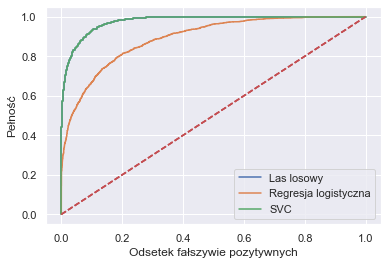

In [50]:
from sklearn.metrics import roc_curve
def plot_roc(fpr, tpr, label = None):
    plt.plot(fpr, tpr, label = label)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("Odsetek fałszywie pozytywnych")
    plt.ylabel("Pełność")
    
    
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest)
fpr_logit, tpr_logit, threshold_logit = roc_curve(y_train, y_scores_logit)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_train, y_scores_svm)

plot_roc(fpr_forest, tpr_forest, "Las losowy")
plot_roc(fpr_logit, tpr_logit, "Regresja logistyczna")
plot_roc(fpr_svm, tpr_svm, "SVC")
plt.legend(loc = "lower right")
plt.show()

# AUC

Obliczone zostały pola pod wykresami.

In [51]:
from sklearn.metrics import auc
print(auc(fpr_svm, tpr_svm), auc(fpr_forest, tpr_forest), auc(fpr_logit, tpr_logit, ))

0.9769512462428018 0.9769512462428018 0.8911787643630145


# TESTOWANIE MODELI

# RECALL - pełność

Miara pełności określi jak dobrze modele zachowują się na danych testowych.

In [52]:
from sklearn.metrics import recall_score
y_pred_logit = log_clf.predict(X_test)
y_pred_forest = clf_forest.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

recall_logit = recall_score(y_test, y_pred_logit)
recall_forest = recall_score(y_test, y_pred_forest)
recall_svm = recall_score(y_test, y_pred_svm)
df = pd.DataFrame(data = [recall_logit, recall_forest, recall_svm], index = ["logit", "forest", "svm"], columns = ["RECALL"])
df

,RECALL
logit,0.706880
forest,0.866164
svm,0.967012


In [53]:
from sklearn.metrics import recall_score
y_pred_train_svm = svm_clf.predict(X_train)
recall_score(y_train,y_pred_train_svm)

0.9820242282141461

Dla najlepszego modelu - SVM wyznaczono również precyzję. Jest ona na zadowalającym poziomie.

In [54]:
from sklearn.metrics import precision_score
precision_svm = precision_score(y_test, y_pred_svm)
precision_svm

0.9508804448563485

# Krzywe ROC oraz miara AUC

Na danych testowych wykreślono przywe ROC. Obliczono również pola pod wykresami.

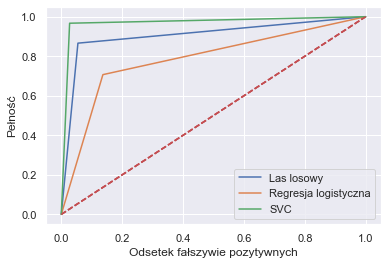

In [55]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_test, y_pred_forest)
fpr_logit, tpr_logit, threshold_logit = roc_curve(y_test, y_pred_logit)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plot_roc(fpr_forest, tpr_forest, "Las losowy")
plot_roc(fpr_logit, tpr_logit, "Regresja logistyczna")
plot_roc(fpr_svm, tpr_svm, "SVC")
plt.legend(loc = "lower right")
plt.show()

In [56]:
print(auc(fpr_svm, tpr_svm), auc(fpr_forest, tpr_forest), auc(fpr_logit, tpr_logit))

0.9698392877193613 0.905748320961814 0.7851059579182016


# Modele bez uwzględnienia mocy

## Random Forest

In [57]:
clf_forest = RandomForestClassifier(n_estimators=1200,
                                    min_samples_split = 2,
                                    min_samples_leaf = 2,
                                    max_features = 'sqrt',
                                    max_depth =  20,
                                    bootstrap = True,
                                    random_state = 42)
clf_forest.fit(X_train_without_p, y_train)
y_predicted = clf_forest.predict(X_test_without_p)
print(confusion_matrix(y_test, y_predicted))
print(recall_score(y_test,y_predicted))

[[1843   96]
 [ 137  924]]
0.8708765315739868


## SVM

In [58]:
svm_clf = SVC(C= 1000, gamma= 0.01, kernel= 'rbf', random_state=42, probability = True)
svm_clf.fit(X_train_without_p, y_train)
y_predicted = svm_clf.predict(X_test_without_p)
print(confusion_matrix(y_test, y_predicted))
print(recall_score(y_test,y_predicted))

[[1888   51]
 [  29 1032]]
0.9726672950047125


## Logistic regression

In [59]:
log_clf =  LogisticRegression(C = 10000000.0, 
                              penalty='l1', 
                              solver='liblinear')
log_clf.fit(X_train_without_p, y_train)

y_predicted = log_clf.predict(X_test_without_p)
print(confusion_matrix(y_test, y_predicted))
print(recall_score(y_test,y_predicted))

[[1673  266]
 [ 315  746]]
0.70311027332705
